In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)

In [3]:
y = x.pow(2) + 0.2*torch.randn(x.shape)

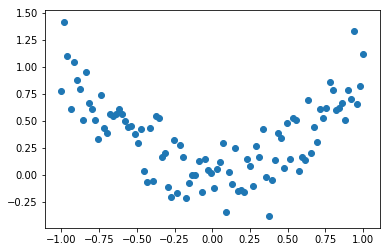

In [4]:
plt.scatter(x.numpy(), y.numpy())

In [5]:
class Net(torch.nn.Module):
    def __init__(self, n_feathers,n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feathers,n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [6]:
net = Net(1,10,1)
parameters = net.parameters()

In [7]:
for item in parameters:
    print(type(item), item.type(), item.requires_grad)

<class 'torch.nn.parameter.Parameter'> torch.FloatTensor True
<class 'torch.nn.parameter.Parameter'> torch.FloatTensor True
<class 'torch.nn.parameter.Parameter'> torch.FloatTensor True
<class 'torch.nn.parameter.Parameter'> torch.FloatTensor True


In [8]:
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


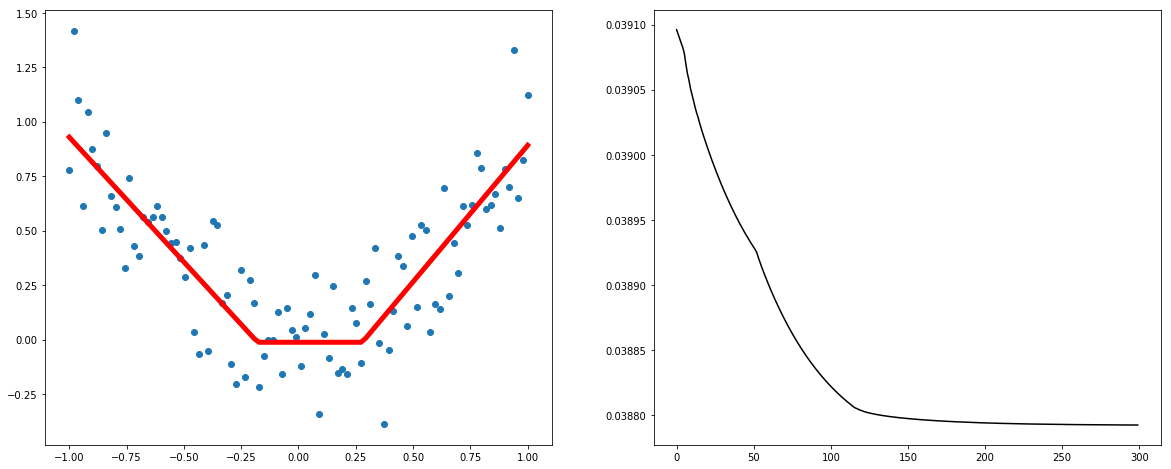

In [11]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
loss_func = torch.nn.MSELoss()

loss_curve = []
for i in range(300):
    predict = net(x)
    
    loss = loss_func(predict, y)
    loss_curve.append(loss)
    
    #print(i, loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.figure(1, figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x.numpy(), y.numpy())
plt.plot(x.numpy(), net(x).data.numpy(),"-r", lw=5)

plt.subplot(1,2,2)
plt.plot(np.arange(len(loss_curve)), np.array(loss_curve), "-k")


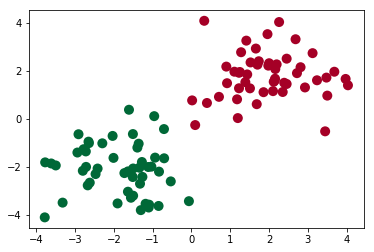

In [12]:
n_data = torch.ones(50,2)
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(50)

x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(50)

x = torch.cat((x0,x1),0).type(torch.FloatTensor)
y = torch.cat((y0,y1),).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy() ,s=100, lw=0, cmap='RdYlGn')

In [20]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)

In [21]:
optimizer = torch.optim.SGD(net2.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

loss:  tensor(1.3447, grad_fn=<NllLossBackward>)
loss:  tensor(1.2025, grad_fn=<NllLossBackward>)
loss:  tensor(1.0732, grad_fn=<NllLossBackward>)
loss:  tensor(0.9569, grad_fn=<NllLossBackward>)
loss:  tensor(0.8535, grad_fn=<NllLossBackward>)
loss:  tensor(0.7627, grad_fn=<NllLossBackward>)
loss:  tensor(0.6837, grad_fn=<NllLossBackward>)
loss:  tensor(0.6158, grad_fn=<NllLossBackward>)
loss:  tensor(0.5578, grad_fn=<NllLossBackward>)
loss:  tensor(0.5084, grad_fn=<NllLossBackward>)
loss:  tensor(0.4663, grad_fn=<NllLossBackward>)
loss:  tensor(0.4304, grad_fn=<NllLossBackward>)
loss:  tensor(0.3996, grad_fn=<NllLossBackward>)
loss:  tensor(0.3731, grad_fn=<NllLossBackward>)
loss:  tensor(0.3502, grad_fn=<NllLossBackward>)
loss:  tensor(0.3301, grad_fn=<NllLossBackward>)
loss:  tensor(0.3124, grad_fn=<NllLossBackward>)
loss:  tensor(0.2967, grad_fn=<NllLossBackward>)
loss:  tensor(0.2827, grad_fn=<NllLossBackward>)
loss:  tensor(0.2702, grad_fn=<NllLossBackward>)
loss:  tensor(0.2589

loss:  tensor(0.0299, grad_fn=<NllLossBackward>)
loss:  tensor(0.0299, grad_fn=<NllLossBackward>)
loss:  tensor(0.0298, grad_fn=<NllLossBackward>)
loss:  tensor(0.0297, grad_fn=<NllLossBackward>)
loss:  tensor(0.0296, grad_fn=<NllLossBackward>)
loss:  tensor(0.0296, grad_fn=<NllLossBackward>)
loss:  tensor(0.0295, grad_fn=<NllLossBackward>)
loss:  tensor(0.0294, grad_fn=<NllLossBackward>)
loss:  tensor(0.0293, grad_fn=<NllLossBackward>)
loss:  tensor(0.0293, grad_fn=<NllLossBackward>)
loss:  tensor(0.0292, grad_fn=<NllLossBackward>)
loss:  tensor(0.0291, grad_fn=<NllLossBackward>)
loss:  tensor(0.0290, grad_fn=<NllLossBackward>)
loss:  tensor(0.0290, grad_fn=<NllLossBackward>)
loss:  tensor(0.0289, grad_fn=<NllLossBackward>)
loss:  tensor(0.0288, grad_fn=<NllLossBackward>)
loss:  tensor(0.0287, grad_fn=<NllLossBackward>)
loss:  tensor(0.0287, grad_fn=<NllLossBackward>)
loss:  tensor(0.0286, grad_fn=<NllLossBackward>)
loss:  tensor(0.0285, grad_fn=<NllLossBackward>)
loss:  tensor(0.0285

loss:  tensor(0.0194, grad_fn=<NllLossBackward>)
loss:  tensor(0.0194, grad_fn=<NllLossBackward>)
loss:  tensor(0.0194, grad_fn=<NllLossBackward>)
loss:  tensor(0.0193, grad_fn=<NllLossBackward>)
loss:  tensor(0.0193, grad_fn=<NllLossBackward>)
loss:  tensor(0.0193, grad_fn=<NllLossBackward>)
loss:  tensor(0.0193, grad_fn=<NllLossBackward>)
loss:  tensor(0.0192, grad_fn=<NllLossBackward>)
loss:  tensor(0.0192, grad_fn=<NllLossBackward>)
loss:  tensor(0.0192, grad_fn=<NllLossBackward>)
loss:  tensor(0.0192, grad_fn=<NllLossBackward>)
loss:  tensor(0.0191, grad_fn=<NllLossBackward>)
loss:  tensor(0.0191, grad_fn=<NllLossBackward>)
loss:  tensor(0.0191, grad_fn=<NllLossBackward>)
loss:  tensor(0.0191, grad_fn=<NllLossBackward>)
loss:  tensor(0.0190, grad_fn=<NllLossBackward>)
loss:  tensor(0.0190, grad_fn=<NllLossBackward>)
loss:  tensor(0.0190, grad_fn=<NllLossBackward>)
loss:  tensor(0.0189, grad_fn=<NllLossBackward>)
loss:  tensor(0.0189, grad_fn=<NllLossBackward>)
loss:  tensor(0.0189

loss:  tensor(0.0157, grad_fn=<NllLossBackward>)
loss:  tensor(0.0157, grad_fn=<NllLossBackward>)
loss:  tensor(0.0157, grad_fn=<NllLossBackward>)
loss:  tensor(0.0157, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0156, grad_fn=<NllLossBackward>)
loss:  tensor(0.0155, grad_fn=<NllLossBackward>)
loss:  tensor(0.0155, grad_fn=<NllLossBackward>)
loss:  tensor(0.0155, grad_fn=<NllLossBackward>)
loss:  tensor(0.0155, grad_fn=<NllLossBackward>)
loss:  tensor(0.0155, grad_fn=<NllLossBackward>)
loss:  tensor(0.0155, grad_fn=<NllLossBackward>)
loss:  tensor(0.0154, grad_fn=<NllLossBackward>)
loss:  tensor(0.0154, grad_fn=<NllLossBackward>)
loss:  tensor(0.0154, grad_fn=<NllLossBackward>)
loss:  tensor(0.0154

loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0132, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131, grad_fn=<NllLossBackward>)
loss:  tensor(0.0131

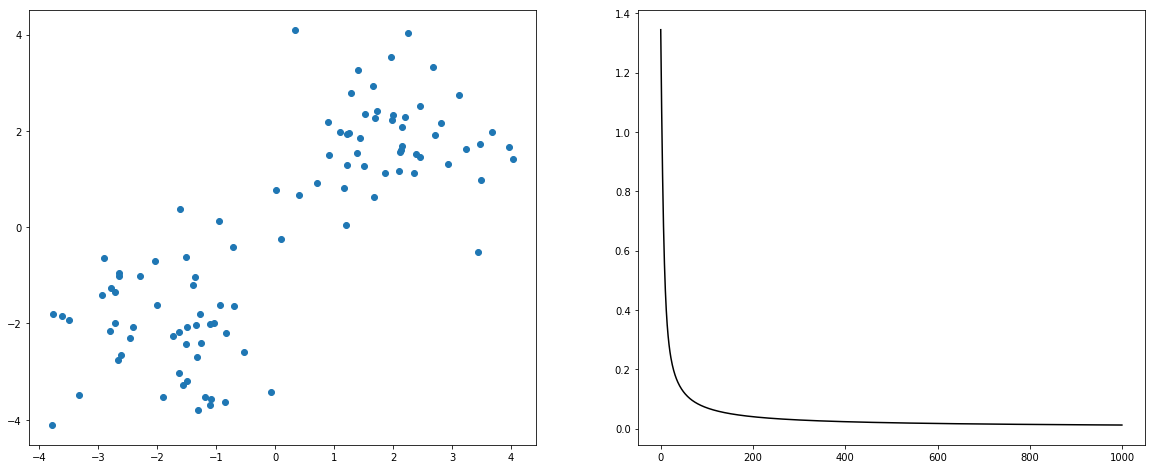

In [22]:
loss_curve = []
for i in range(1000):
    out = net2(x)
    
    loss = loss_func(out, y)
    loss_curve.append(loss)
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print("loss: ",loss)

    
plt.figure(1, figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(x.numpy()[:,0], x.numpy()[:,1])
# plt.plot(x.numpy(), net(x).data.numpy(),"-r", lw=5)

plt.subplot(1,2,2)
plt.plot(np.arange(len(loss_curve)), np.array(loss_curve), "-k")